In [ ]:
from __future__ import division
import numpy as np

from scipy.stats import norm, invgamma

In [50]:
def gibbs(y, nu, tau2, alpha, beta, n_samples, burn_in=100):
    """
    Assuming a likelihood and priors
        y_i ~ N(mu, sigma2),
        mu ~ N(nu, tau2),
        sigma2 ~ IG(alpha, beta),
    sample from the posterior distribution
        P(mu, sigma2 | y, nu, tau2, alpha, beta)
    using a gibbs sampler.
    
    Parameters
    ----------
    y : ndarray of shape (N,)
        The data
    nu : float
        The prior mean parameter for mu
    tau2 : float > 0
        The prior variance parameter for mu
    alpha : float > 0
        The prior alpha parameter for sigma2
    beta : float > 0
        The prior beta parameter for sigma2
    n_samples : int
        The number of samples to draw
    burn_in : int
        Number of initial samples to throw away
    
    Returns
    -------
    samples : ndarray of shape (n_samples,2)
        1st col = mu samples, 2nd col = sigma2 samples
    """
    mu, sigma2 = y.mean(), 10
    N = y.shape[0]
    
    samples = []
    for k in xrange(n_samples+burn_in):
        sigma2_star = 1/(1/tau2 + N/sigma2)
        mu_star = sigma2_star*(nu/tau2 + 1/sigma2*y.sum())
        mu = norm.rvs(mu_star, scale=np.sqrt(sigma2_star))

        alpha_star = alpha + N/2
        beta_star = beta + .5*np.sum((y - mu)**2)        
        sigma2 = invgamma.rvs(alpha_star, scale=beta_star)
        
        samples.append([mu, sigma2])
        
    return np.array(samples)[burn_in:]

## Problem 1

In [78]:
y = np.loadtxt('examscores.csv')
nu = 80
tau2 = 16
alpha = 3
beta = 50
n_samples=1000

samples = gibbs(y, nu, tau2, alpha, beta, n_samples)
mu_samples = samples[:,0]
sigma2_samples = samples[:,1]

## Problem 2

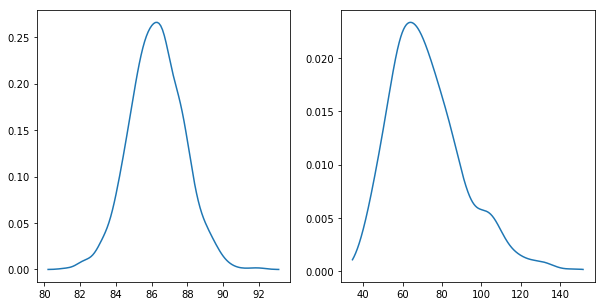

In [79]:
import numpy as np
from scipy.stats import gaussian_kde
from matplotlib import rcParams, pyplot as plt

rcParams['figure.figsize'] = (10,5)

mu_kernel = gaussian_kde(mu_samples)
x_min = min(mu_samples) - 1
x_max = max(mu_samples) + 1
x = np.arange(x_min, x_max, step=0.1)

plt.subplot(121)
plt.plot(x,mu_kernel(x))

sigma2_kernel = gaussian_kde(sigma2_samples)
x_min = min(sigma2_samples) - 1
x_max = max(sigma2_samples) + 1
x = np.arange(x_min, x_max, step=0.1)

plt.subplot(122)
plt.plot(x,sigma2_kernel(x))
plt.show()

## Problem 3

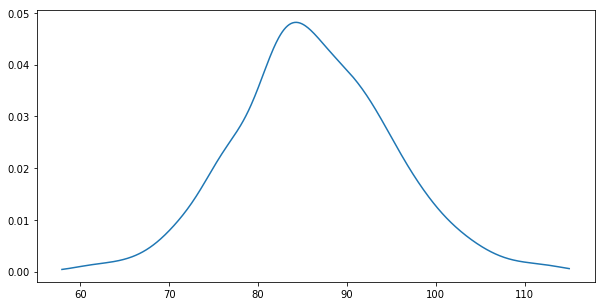

In [80]:
norm_draw = lambda x : norm.rvs(x[0], np.sqrt(x[1]))
yhat_samples = np.apply_along_axis(norm_draw, 1, samples)

yhat_kernel = gaussian_kde(yhat_samples)
x_min = min(yhat_samples) - 1
x_max = max(yhat_samples) + 1
x = np.arange(x_min, x_max, step=0.1)

plt.plot(x, yhat_kernel(x))
#plt.plot(x, norm(y.mean(), y.std()).pdf(x))
plt.show()